In [1]:
import numpy as np
import matplotlib.pyplot as plt

[0.37454012 0.95071431] 0.7319939418114051 [0.51167106 1.29880079]


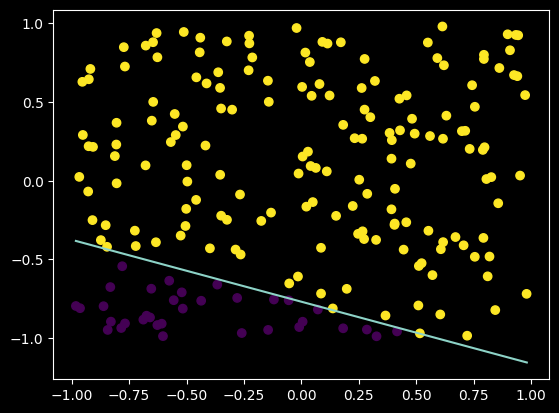

In [37]:
np.random.seed(42)
w = np.random.rand(2)
b = np.random.rand()

number_of_points = 200
x = np.random.rand(number_of_points, 2) * 2 - 1
y = np.dot(x, w) + b > 0

def plot(w, b, x, y):
    x1 = np.linspace(np.min(x[:, 0]), np.max(x[:, 1]), number_of_points)
    if w[1] == 0:
        x2 = (-b - w[0] * x1) / (w[1] + 1e-8)
    else:
        x2 = (-b - w[0] * x1) / w[1]

    plt.plot(x1, x2)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.show()
print(w, b, w/b)
plot(w, b, x, y)

0 [3.1120971  0.37185405] 0.6417521549834029 [4.84937539 0.5794356 ]


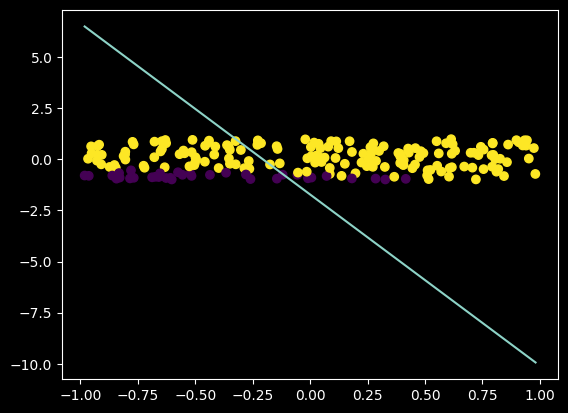

40000 [28.53112234 70.54772111] 54.77025444036927 [0.52092368 1.28806634]


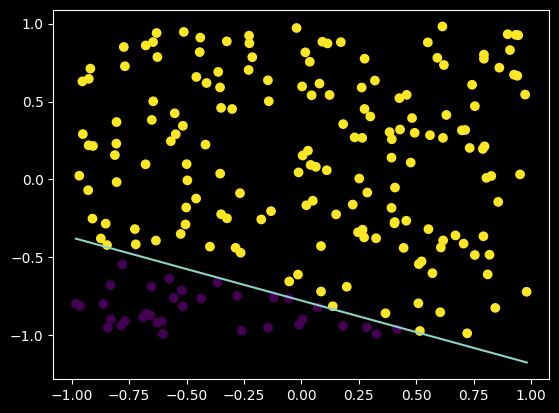

80000 [28.82548788 70.2222524 ] 54.335686154424664 [0.53050748 1.29237813]


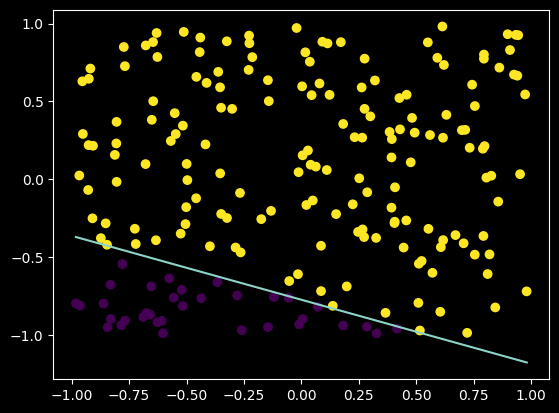

120000 [29.36535883 69.83445287] 53.739187254991386 [0.54644218 1.29950705]


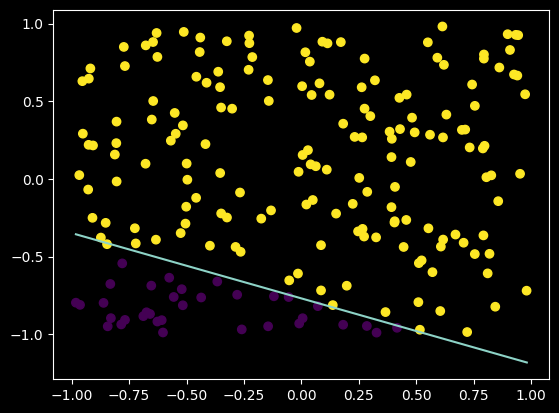

160000 [29.63833388 70.96557694] 54.71014684760039 [0.54173377 1.29711911]


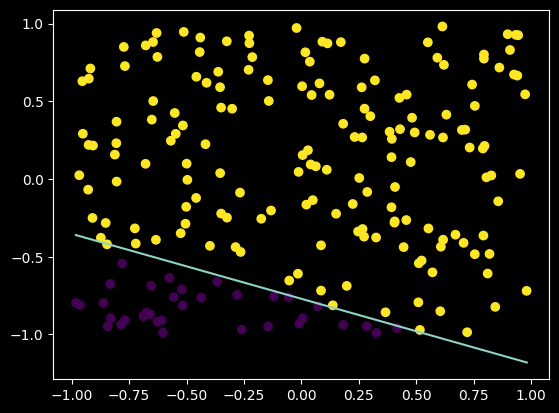

In [40]:
class Svm:
    def __init__(self, x, y, C=np.inf):
        assert x.shape[0] == y.shape[0]
        self.x = x
        self.y = np.array([-1 if yy == 0 else 1 for yy in y])
        self.alpha = np.zeros(x.shape[0])
        self.b = 0
        self.C = C
        self.eps = 1e-3

    def run(self, iter = 200000):
        for i in range(iter):
            has_ended = self.run_iteration()

            w = self.calculate_w()

            if has_ended:
                print("Iteration %d has ended" % i)
                print(self.alpha, w, self.b, w/self.b)
                plot(w, self.b, self.x, self.y)
                return
            if i % (iter / 5) == 0:
                print(i, w, self.b, w/self.b)
                plot(w, self.b, self.x, self.y)

    def run_iteration(self):
        index1 = self.find_alpha_that_does_not_respect_constraints()
        index2 = self.get_random_alpha(index1)

        if index1 is None:
            return True

        x1, x2 = self.x[index1], self.x[index2]
        y1, y2 = self.y[index1], self.y[index2]
        alpha1, alpha2 = self.alpha[index1], self.alpha[index2]

        error1 = self.predict(x1) - y1
        error2 = self.predict(x2) - y2
        k11 = np.dot(x1, x1)
        k12 = np.dot(x1, x2)
        k22 = np.dot(x2, x2)

        second_derivative = 2 * k12 - k11 - k22
        if second_derivative == 0:
            return False
        alpha2_new = alpha2 - y2 * (error1 - error2) / second_derivative

        L = max(0, alpha2 - alpha1) if y1 != y2 else max(0, alpha2 + alpha1 - self.C)
        H = min(self.C, self.C + alpha2 - alpha1) if y1 != y2 else min(self.C, alpha2 + alpha1)

        alpha2_new = np.clip(alpha2_new, L, H)
        alpha1_new = alpha1 + y1 * y2 * (alpha2 - alpha2_new)

        self.alpha[index1] = alpha1_new
        self.alpha[index2] = alpha2_new

        b1 = self.b - error1 - y1 * (alpha1_new - alpha1) * k11 - y2 * (alpha2_new - alpha2) * k12
        b2 = self.b - error2 - y1 * (alpha1_new - alpha1) * k12 - y2 * (alpha2_new - alpha2) * k22
        if 0 < alpha1_new < self.C:
            self.b = b1
        elif 0 < alpha2_new < self.C:
            self.b = b2
        else:
            self.b = 0.5 * (b1 + b2)

        return False

    def find_alpha_that_does_not_respect_constraints(self):
        for i in range(self.x.shape[0]):
            w = self.calculate_w()
            f_xi = np.dot(self.x[i], w) + self.b
            margin = self.y[i] * f_xi

            # Check for violations using C and a tolerance (tol)
            if (self.alpha[i] < self.C and margin < 1 - self.eps) or (self.alpha[i] > 0 and margin > 1 + self.eps):
                return i
        return None

    def get_random_alpha(self, index):
        index2 = np.random.randint(self.x.shape[0])
        while index2 == index:
            index2 = np.random.randint(self.x.shape[0])
        return index2

    def calculate_w(self):
        return self.alpha * self.y @ self.x

    def predict(self, x):
        w = self.calculate_w()
        return np.dot(x, w) + self.b

svm = Svm(x, y)
svm.run()
